<a href="https://colab.research.google.com/github/irfan7210/Car-details-price-prediction-short-project---on-car-dekho-dataset/blob/main/car_details_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')


In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [3]:
#Importing data set
df =pd.read_csv("/content/drive/MyDrive/Project/CAR DETAILS (1).csv")

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

The number of rows in data is: 4340
The number of columns in data is 8


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
# df.duplicated().sum()
duplicate_rows_in_store_data = df.duplicated().sum()
print('The number of duplicates in store data is:',duplicate_rows_in_store_data)

The number of duplicates in store data is: 763


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(list(df.columns))

['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


In [10]:
# Dataset Describe
df.describe()


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Variables Description 

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

for col in df.columns:
  print(f'The unique values in {col} are {df[col].unique()}' )

The unique values in name are ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
The unique values in year are [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]
The unique values in selling_price are [  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  900000 1300000 1400000  229999
 1550000 1250000  625000 1050000  560000  290000  275000  411000  150000
  500000  100000  725000  401000  750000  310000  665000  465000  160000
  675000  300000   70000  151000  280000  350000  570000  125000  130000
  925000  200000  248000   80000  650000  495000  371000 1025000 8150000
  325000 1470000 2800000  210000 1150000 4500000 2750000 1975000  1750

## 3. ***Data Wrangling and visualization***

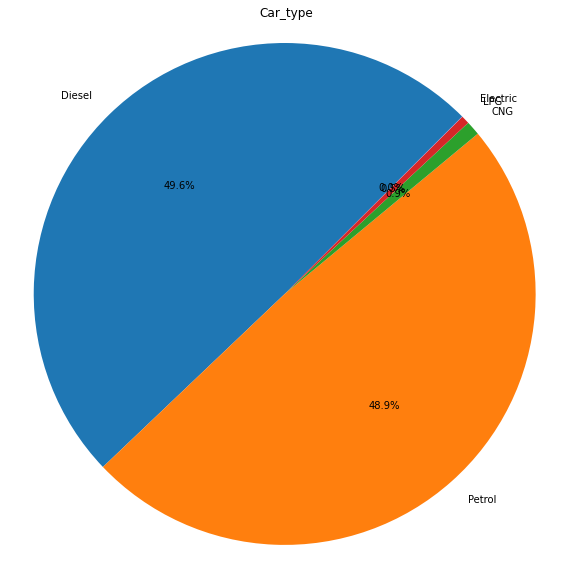

In [12]:
# Get the counts of each category in the column
counts = df['fuel'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%' , startangle=45 , textprops={'fontsize': 10})
plt.axis('equal')
plt.title('Car_type')
plt.show()

In [13]:
unique_car = df["name"].nunique()
print("The number of unique car count variables is:", unique_car)

The number of unique car count variables is: 1491


In [14]:
car_owner = df.groupby("owner")["name"].count().reset_index()
car_owner


,owner,name
0,First Owner,2832
1,Fourth & Above Owner,81
2,Second Owner,1106
3,Test Drive Car,17
4,Third Owner,304


<AxesSubplot:title={'center':'car_owner Type'}, xlabel='owner', ylabel='name'>

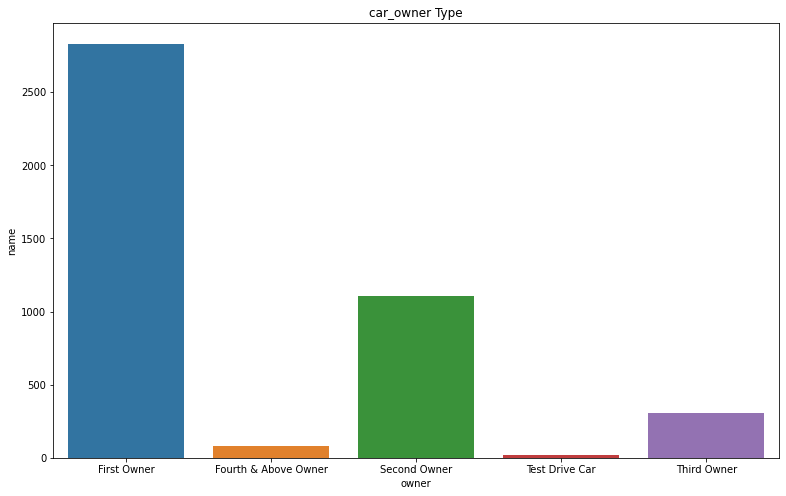

In [15]:
plt.figure(figsize=(13,8))
plt.title('car_owner Type')
sns.barplot(x='owner',y='name',data=car_owner)

In [16]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [17]:
selling_price = df.groupby("fuel")["selling_price"].sum().reset_index()
selling_price

,fuel,selling_price
0,CNG,11086997
1,Diesel,1440559925
2,Electric,310000
3,LPG,3859999
4,Petrol,732095612


<AxesSubplot:title={'center':'max_sell_CAR_Type'}, xlabel='fuel', ylabel='selling_price'>

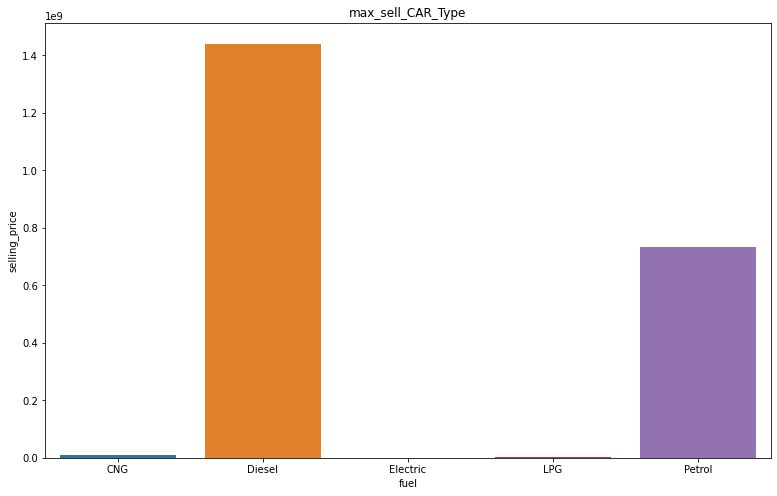

In [18]:
plt.figure(figsize=(13,8))
plt.title('max_sell_CAR_Type')
sns.barplot(x='fuel',y='selling_price',data=selling_price)

owner        selling_price
First Owner  300000           114
             550000            87
             600000            84
Name: selling_price, dtype: int64
owner         selling_price
Second Owner  150000           43
              300000           42
              450000           41
Name: selling_price, dtype: int64
owner                 selling_price
Fourth & Above Owner  110000           7
                      70000            6
                      250000           6
Name: selling_price, dtype: int64
owner        selling_price
Third Owner  150000           14
             120000           11
             110000            9
Name: selling_price, dtype: int64
owner           selling_price
Test Drive Car  541000           1
                635000           1
                700000           1
Name: selling_price, dtype: int64


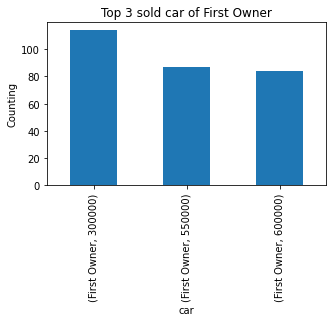

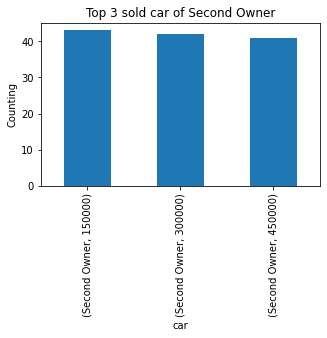

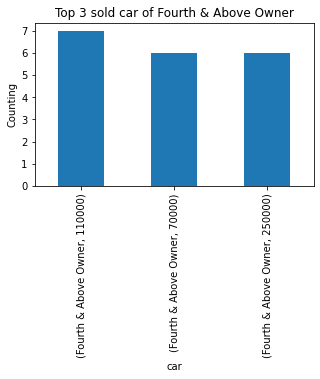

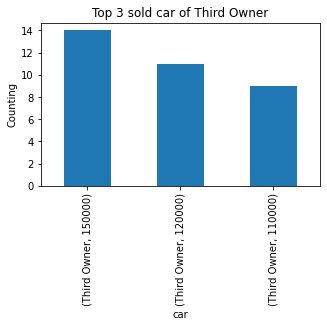

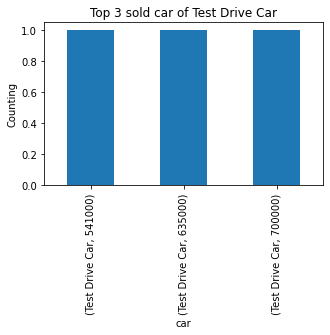

In [19]:
# Chart - 4 visualization code
newlist=df['owner'].unique()
y=list(newlist)
# Applying for loop operation
for x in y:
  sub_1=df.loc[df['owner'] == x]
  p_sub1=sub_1.groupby(['owner'])['selling_price'].value_counts().head(3)
  print(p_sub1)
  plt.figure(figsize=(5,3))
  p_sub1.plot(kind='bar')
  plt.title('Top 3 sold car of '+str(x))
  plt.xlabel("car")
  plt.ylabel("Counting")

In [20]:
df_plot=df.groupby(['seller_type'])['name'].count().reset_index()
df_plot

,seller_type,name
0,Dealer,994
1,Individual,3244
2,Trustmark Dealer,102


<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

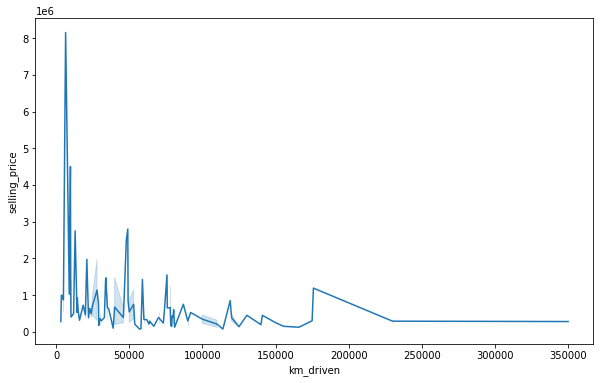

In [21]:
#visualization code
#Writing a code for plotting line plot between the target variable and age, cigsPerDay, and heartRate
plt.figure(figsize=(10, 6))
sns.lineplot(x='km_driven', y="selling_price", data=df.head(200))


## ***6. Feature Engineering & Data Pre-processing***

In [22]:
df1 = df [['year', 'selling_price', 'km_driven',
       'fuel', 'seller_type', 'transmission', 'owner']]

In [23]:
df1['Current_Year'] = 2022

In [24]:
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Current_Year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022


In [25]:
#Creating our new column no_of_year
df1['Year_old'] = df1['Current_Year'] - df1['year']

In [26]:
#One Hot Encoding for Categorical variables by creating dummy variables
df1 = pd.get_dummies(df1, drop_first = True)

In [27]:
df1.drop(['year','Current_Year'], axis=1, inplace=True)

In [28]:
df1.head()

,selling_price,km_driven,Year_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


### 2. Handling Outliers

<AxesSubplot:ylabel='Density'>

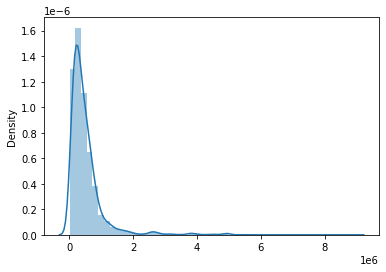

In [29]:
#plotting distribution plot of target Variables
sns.distplot(x=df1.selling_price)

<AxesSubplot:ylabel='Density'>

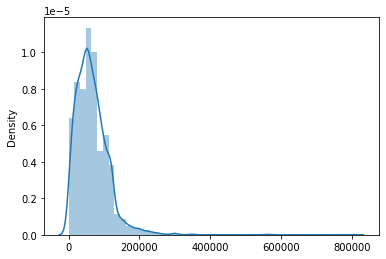

In [30]:
#plotting distribution plot of target Variables
sns.distplot(x=df1.km_driven)

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables i.e. data distribution of a variable against the density distribution. In above graph we can see that our graph have right tail(right skewed) it means tha our most of data centered near peak of the graph but there is a some highly expensive price that leads to a seperate trends that's why our graph showing right trends.

In [31]:
# take the natural logarithm of a column called "column_to_transform"
df1["selling_price_lg"] = np.log(df1["selling_price"])

Logarithmic transformation is a mathematical operation used in data analysis and modeling to convert data that is not normally distributed to a normal distribution. It is a type of data transformation that can be applied to data that has a wide range of values or is skewed in one direction.

<AxesSubplot:ylabel='Density'>

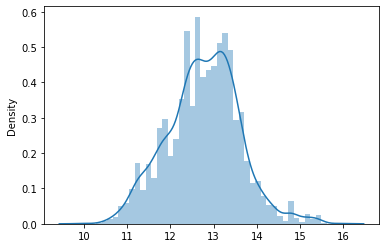

In [32]:
#plotting distribution plot of target Variables
sns.distplot(x=df1.selling_price_lg)

In [33]:

# calculate the upper and lower limits for the km_driven column using the capping method
Q1 = df1["km_driven"].quantile(0.25)
Q3 = df1["km_driven"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

# replace outliers above the upper limit with the nearest non-outlier value, and outliers below the lower limit with the nearest non-outlier value
df1["km_driven"] = np.where(df1["km_driven"] > upper_limit, df1["km_driven"].quantile(0.95), df1["km_driven"])
df1["km_driven"] = np.where(df1["km_driven"] < lower_limit, df1["km_driven"].quantile(0.05), df1["km_driven"])


In above, the upper and lower limits are calculated using the interquartile range (IQR) multiplied by 1.5. Any values above the upper limit or below the lower limit are replaced with the 99th or 1st percentile value, respectively, using the NumPy where function

<AxesSubplot:ylabel='Density'>

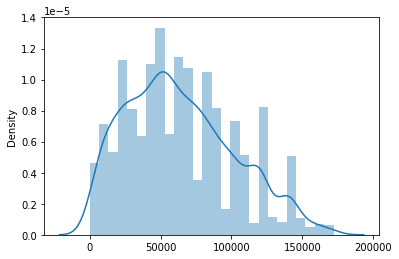

In [34]:
sns.distplot(x=df1.km_driven)

In [35]:
df1["km_driven_sqrt"] = np.sqrt(df1["km_driven"])

<AxesSubplot:ylabel='Density'>

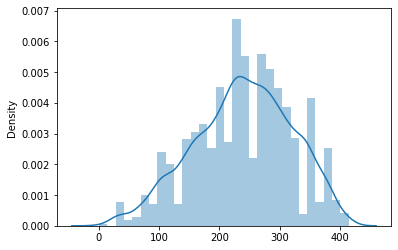

In [36]:
sns.distplot(x=df1.km_driven_sqrt)

after transforming the data now we can see that our data looks good and Logarithmic transformation converted our data to a normal distribution. It is a type of data transformation that can be applied to data that has a wide range of values or is skewed in one direction.

In [37]:
df1.head()

,selling_price,km_driven,Year_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,selling_price_lg,km_driven_sqrt
0,60000,70000.0,15,0,0,0,1,1,0,1,0,0,0,0,11.002100,264.575131
1,135000,50000.0,15,0,0,0,1,1,0,1,0,0,0,0,11.813030,223.606798
2,600000,100000.0,10,1,0,0,0,1,0,1,0,0,0,0,13.304685,316.227766
3,250000,46000.0,5,0,0,0,1,1,0,1,0,0,0,0,12.429216,214.476106
4,450000,141000.0,8,1,0,0,0,1,0,1,0,1,0,0,13.017003,375.499667


In [40]:
#dropping un_necessary colmns
df1.drop(['selling_price','km_driven'], axis=1, inplace=True)

In [41]:
df1.head()

,Year_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,selling_price_lg,km_driven_sqrt
0,15,0,0,0,1,1,0,1,0,0,0,0,11.002100,264.575131
1,15,0,0,0,1,1,0,1,0,0,0,0,11.813030,223.606798
2,10,1,0,0,0,1,0,1,0,0,0,0,13.304685,316.227766
3,5,0,0,0,1,1,0,1,0,0,0,0,12.429216,214.476106
4,8,1,0,0,0,1,0,1,0,1,0,0,13.017003,375.499667
